<a href="https://colab.research.google.com/github/chethana613/compvision-deeplearning/blob/main/Programming1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('/content/sample_data/filter1_img.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/sample_data/filter2_img.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
print(image1.shape)
print(image2.shape)

(512, 512)
(530, 800)


In [5]:
import numpy as np

#Given Gaussian filters
gaussian_3x3 = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]]) / 16

gaussian_5x5 = np.array([[1,  4,  7,  4,  1],
                         [4, 16, 26, 16,  4],
                         [7, 26, 41, 26,  7],
                         [4, 16, 26, 16,  4],
                         [1,  4,  7,  4,  1]]) / 273


In [6]:
def apply_padding(image, pad_width):
    return np.pad(image, pad_width, mode='constant', constant_values=0)


In [7]:
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    pad_width = kernel_height // 2
    padded_image = apply_padding(image, pad_width)
    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result


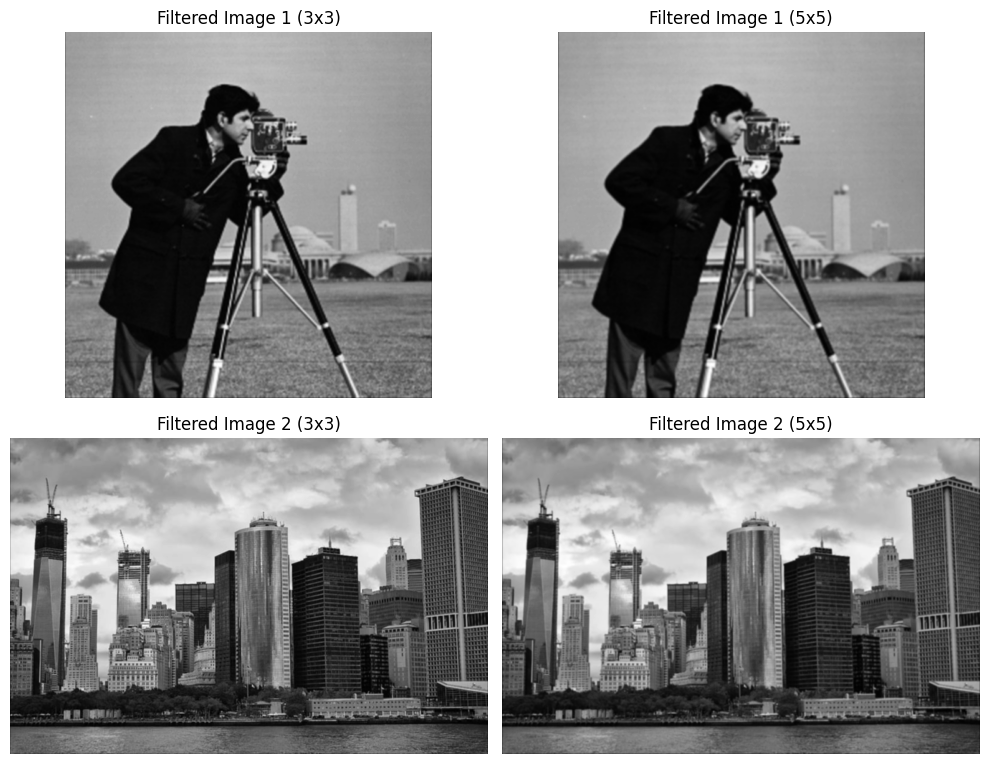

In [8]:
# Appling Gaussian filters to images
filtered_image1_3x3 = convolve(image1, gaussian_3x3)
filtered_image1_5x5 = convolve(image1, gaussian_5x5)
filtered_image2_3x3 = convolve(image2, gaussian_3x3)
filtered_image2_5x5 = convolve(image2, gaussian_5x5)

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Filtered Image 1 (3x3)')
plt.imshow(filtered_image1_3x3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Filtered Image 1 (5x5)')
plt.imshow(filtered_image1_5x5, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Filtered Image 2 (3x3)')
plt.imshow(filtered_image2_3x3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Filtered Image 2 (5x5)')
plt.imshow(filtered_image2_5x5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(ii)

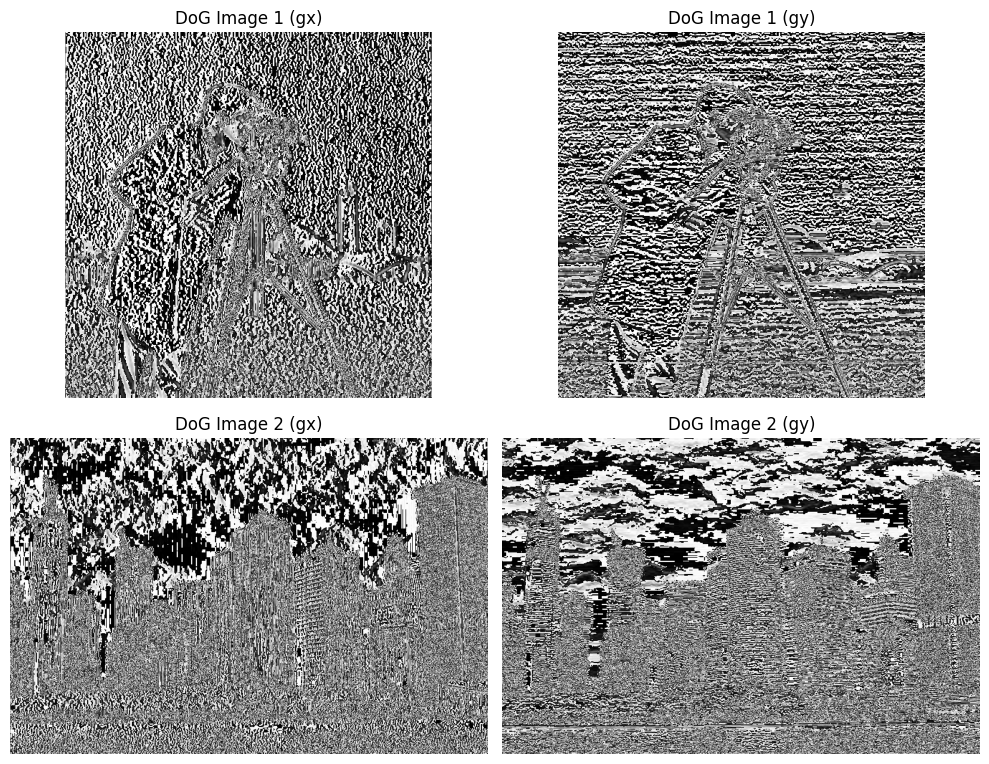

In [9]:
#DoG filters
gx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

gy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

#Applying DoG filters to images
dog_image1_gx = convolve(image1, gx)
dog_image1_gy = convolve(image1, gy)
dog_image2_gx = convolve(image2, gx)
dog_image2_gy = convolve(image2, gy)


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('DoG Image 1 (gx)')
plt.imshow(dog_image1_gx, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('DoG Image 1 (gy)')
plt.imshow(dog_image1_gy, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('DoG Image 2 (gx)')
plt.imshow(dog_image2_gx, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('DoG Image 2 (gy)')
plt.imshow(dog_image2_gy, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(iii)

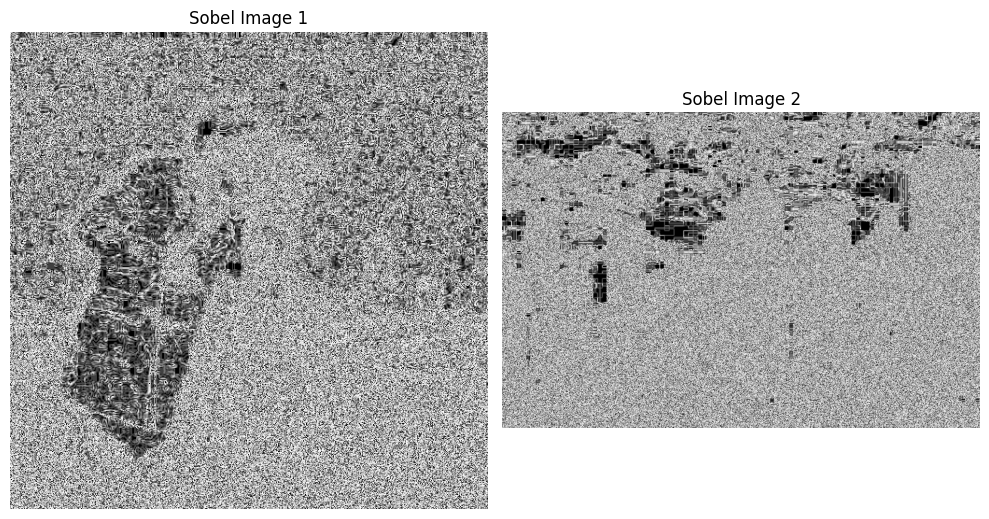

In [10]:
def sobel_filter(image):
    gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    gy = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

    image_gx = convolve(image, gx)
    image_gy = convolve(image, gy)

    sobel_result = np.sqrt(image_gx**2 + image_gy**2)
    return sobel_result

#Sobel filters to images
sobel_image1 = sobel_filter(image1)
sobel_image2 = sobel_filter(image2)

# Display Sobel filter results
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Sobel Image 1')
plt.imshow(sobel_image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sobel Image 2')
plt.imshow(sobel_image2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Part2

K = 2, SSE = 2228.619218804037


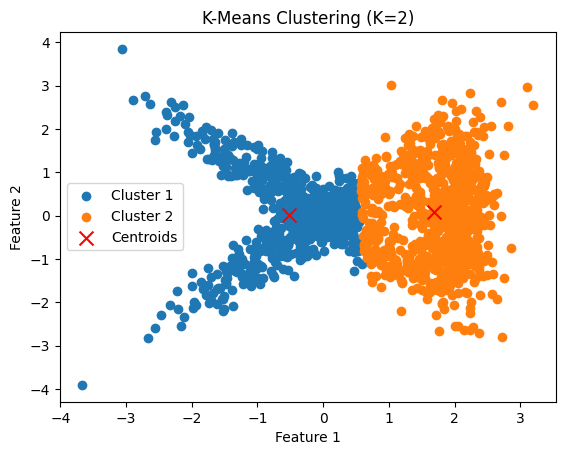

K = 3, SSE = 1539.2566749916352


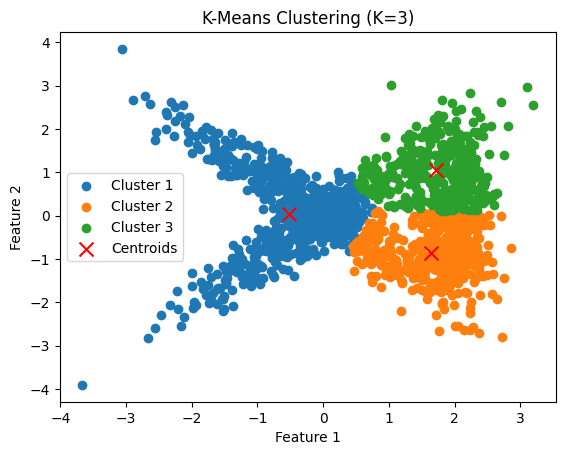

K = 4, SSE = 1103.5070477213324


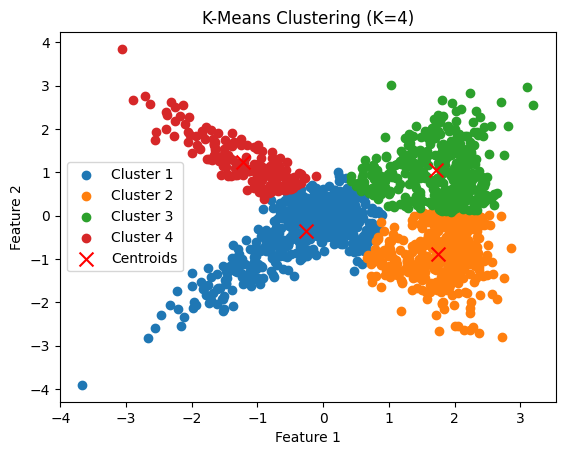

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Initializing
def initialize_centroids(data, K):
    return data[np.random.choice(data.shape[0], K, replace=False)]

#assignment
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

#updating centroids
def update_centroids(data, labels, K):
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])

#SSE Calculation
def compute_sse(data, labels, centroids):
    return np.sum((data - centroids[labels]) ** 2)


def kmeans(data, K, r=10):
    best_sse = float('inf')
    best_centroids = None
    best_labels = None

    for _ in range(r):
        centroids = initialize_centroids(data, K)
        for _ in range(100):  # Assume max 100 iterations for convergence
            labels = assign_clusters(data, centroids)
            new_centroids = update_centroids(data, labels, K)

            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        sse = compute_sse(data, labels, centroids)
        if sse < best_sse:
            best_sse = sse
            best_centroids = centroids
            best_labels = labels

    return best_labels, best_centroids, best_sse


data = np.loadtxt('/content/sample_data/510_cluster_dataset.txt')

#For K = 2, 3, 4
for K in [2, 3, 4]:
    labels, centroids, sse = kmeans(data, K)
    print(f"K = {K}, SSE = {sse}")

    plt.figure()
    for k in range(K):
        cluster_points = data[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={K})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


<ipython-input-11-c802ab0fdeb7>:15: RuntimeWarning: Mean of empty slice.
  return np.array([data[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


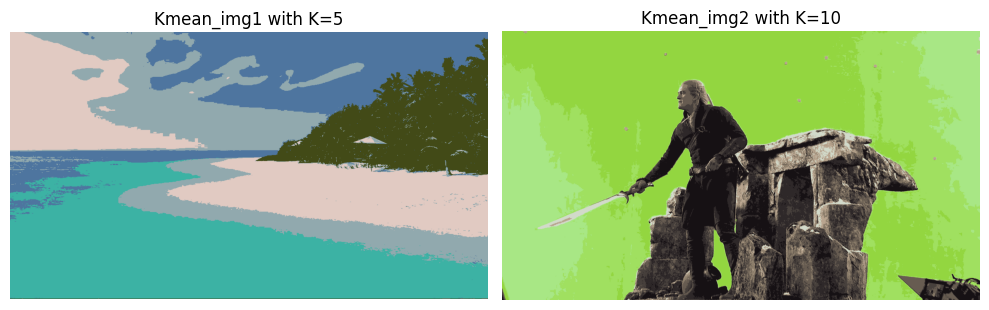

In [12]:
import cv2


def kmeans_image(image_path, K):
    image = cv2.imread(image_path)
    data = image.reshape((-1, 3))

    labels, centroids, _ = kmeans(data, K)

    #Replacing each pixel value with its cluster centroid value
    new_image = centroids[labels].reshape(image.shape).astype(np.uint8)

    return new_image

#K-Means to the images with K=5 and K=10
image1_k5 = kmeans_image('/content/sample_data/Kmean_img1.jpg', 5)
image2_k10 = kmeans_image('/content/sample_data/Kmean_img2.jpg', 10)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Kmean_img1 with K=5')
plt.imshow(cv2.cvtColor(image1_k5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Kmean_img2 with K=10')
plt.imshow(cv2.cvtColor(image2_k10, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


Part-3

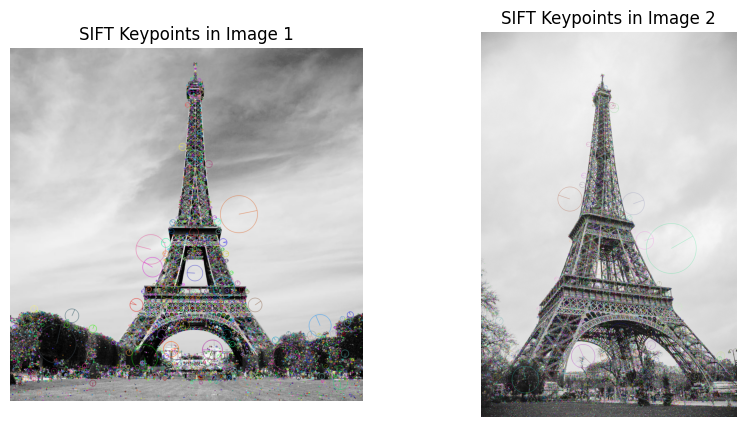

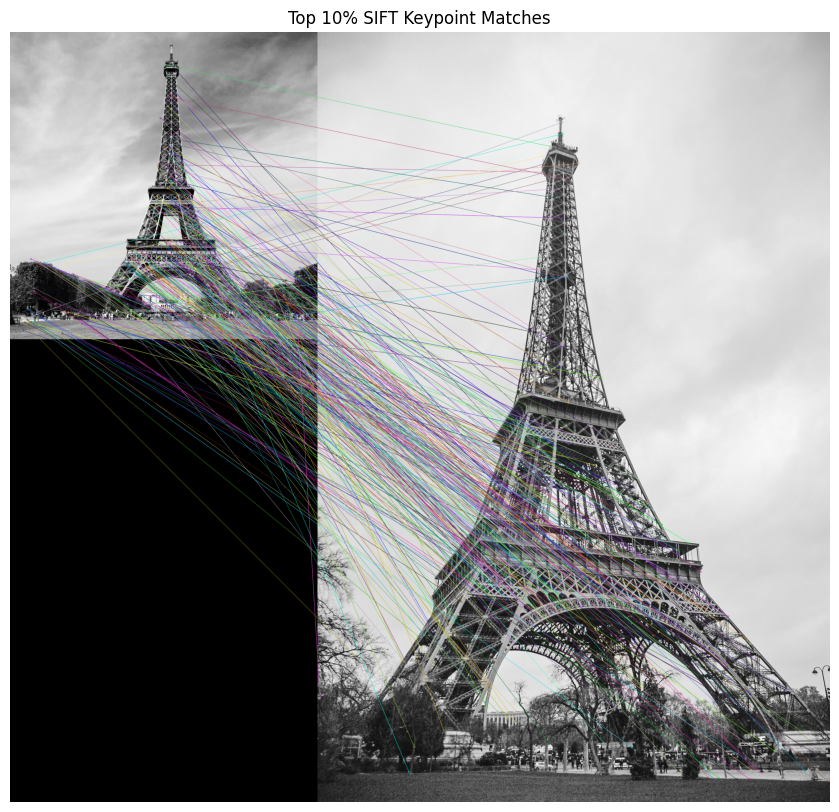

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread('/content/sample_data/SIFT1_img.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/sample_data/SIFT2_img.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

#Detecting keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

#Drawing keypoints on images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Displaying images with keypoints
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('SIFT Keypoints in Image 1')
plt.imshow(image1_with_keypoints, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('SIFT Keypoints in Image 2')
plt.imshow(image2_with_keypoints, cmap='gray')
plt.axis('off')

plt.show()

#Matching keypoints using the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_1, descriptors_2)

#Sorting matches by distance (the lower the distance, the better the match)
matches = sorted(matches, key=lambda x: x.distance)

#Top 10% of matches
num_good_matches = int(len(matches) * 0.1)
good_matches = matches[:num_good_matches]

#Drawing matches
matched_image = cv2.drawMatches(image1, keypoints_1, image2, keypoints_2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.title('Top 10% SIFT Keypoint Matches')
plt.imshow(matched_image)
plt.axis('off')
plt.show()
